# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     815.9
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           7.11e-40
Time:                        10:56:16   Log-Likelihood:                -1.7697
No. Observations:                  50   AIC:                             11.54
Df Residuals:                      46   BIC:                             19.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0701      0.089     56.914      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.60940217  5.08218274  5.51546374  5.88136616  6.16207238  6.35275354
  6.46236295  6.51216503  6.53224166  6.55654982  6.61734252  6.73986974
  6.93822995  7.21305375  7.55140024  7.92888323  8.31367777  8.67174895
  8.97244367  9.19352693  9.32483493  9.36994498  9.34558774  9.27889842
  9.20295857  9.15136083  9.15268979  9.22582561  9.37684207  9.59800865
  9.86906064 10.16052859 10.43858003 10.67057806 10.83044352 10.9029397
 10.88617567 10.79191701 10.64365271 10.47273601 10.31323317 10.19632643
 10.14519093 10.17118703 10.27199387 10.43199069 10.62482324 10.81773374
 10.97694289 11.07319969]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.07715837 10.94705562 10.70295249 10.39056557 10.07007397  9.80138538
  9.62946857  9.5733435   9.62142451  9.73435695]


## Plot comparison

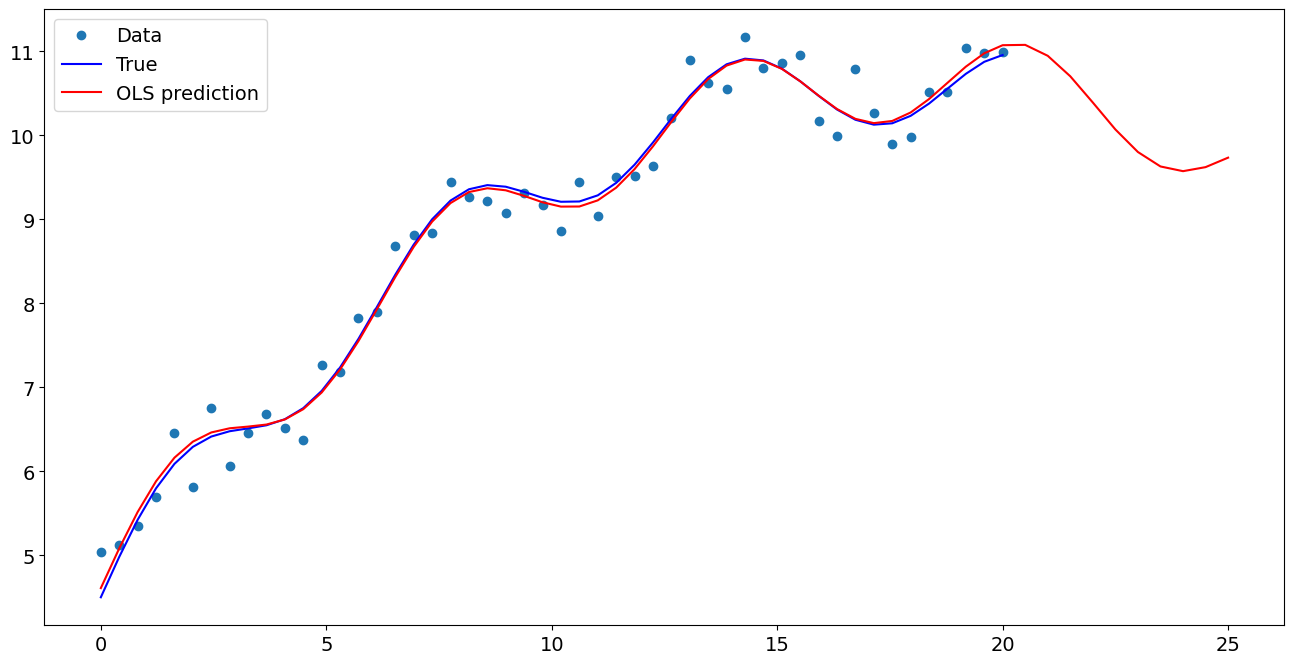

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.070065
x1                  0.484104
np.sin(x1)          0.511550
I((x1 - 5) ** 2)   -0.018427
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.077158
1    10.947056
2    10.702952
3    10.390566
4    10.070074
5     9.801385
6     9.629469
7     9.573343
8     9.621425
9     9.734357
dtype: float64